In [1]:
from sklearn.metrics import mean_squared_error, r2_score, PredictionErrorDisplay
from sklearn.linear_model import LinearRegression  
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from joblib import load
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas - pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("rotten_dataframe.csv")

In [3]:
# Veri çerçevesini yükle
df = pd.read_csv("rotten_dataframe.csv")

# 'Unnamed: 0' sütununu sil
df = df.drop(columns=['Unnamed: 0'])

# Veriyi güncelle
df.to_csv("güncellenmiş_veri.csv", index=False)

In [4]:
df

,Name,Genre,Revenue,Director,Tomatometer,Audience
0,Argylle,Action,$44.0M,Matthew Vaughn,33,72
1,Perfect Days,Drama,$2.1M,Wim Wenders,96,91
2,Poor Things,Comedy,$33.5M,Yorgos Lanthimos,92,79
3,Dune,Sci-fi,$108.3M,Denis Villeneuve,83,9
4,The Zone of Interest,History,$7.7M,Jonathan Glazer,93,78
...,...,...,...,...,...,...
7934,Freelance,Action,$5.3M,Pierre Morel,6,76
7935,Avengers: Endgame,Action,$858.4M,Anthony Russo,94,9
7936,Strays,Comedy,$23.9M,Josh Greenbaum,53,69
7937,Next Goal Wins,Comedy,$6.7M,Taika Waititi,45,84


In [5]:
# "$", "M" ve "K" işaretlerini kaldırarak milyon birimine çevirme
def convert_to_million(x):
    if 'M' in x:
        return float(x.replace('$', '').replace('M', '')) * 10**6
    elif 'K' in x:
        return float(x.replace('$', '').replace('K', '')) * 10**3
    else:
        return float(x.replace('$', ''))

df['Revenue'] = df['Revenue'].apply(convert_to_million)

# Veri setini kontrol etme
print(df)


                      Name          Genre      Revenue          Director  \
0                  Argylle         Action   44000000.0    Matthew Vaughn   
1             Perfect Days          Drama    2100000.0       Wim Wenders   
2              Poor Things         Comedy   33500000.0  Yorgos Lanthimos   
3                     Dune         Sci-fi  108300000.0  Denis Villeneuve   
4     The Zone of Interest        History    7700000.0   Jonathan Glazer   
...                    ...            ...          ...               ...   
7934             Freelance         Action    5300000.0      Pierre Morel   
7935     Avengers: Endgame         Action  858400000.0     Anthony Russo   
7936                Strays         Comedy   23900000.0    Josh Greenbaum   
7937        Next Goal Wins         Comedy    6700000.0     Taika Waititi   
7938           Turning Red  Kids & family    1300000.0         Domee Shi   

      Tomatometer  Audience  
0              33        72  
1              96        91

In [6]:
df

,Name,Genre,Revenue,Director,Tomatometer,Audience
0,Argylle,Action,44000000.0,Matthew Vaughn,33,72
1,Perfect Days,Drama,2100000.0,Wim Wenders,96,91
2,Poor Things,Comedy,33500000.0,Yorgos Lanthimos,92,79
3,Dune,Sci-fi,108300000.0,Denis Villeneuve,83,9
4,The Zone of Interest,History,7700000.0,Jonathan Glazer,93,78
...,...,...,...,...,...,...
7934,Freelance,Action,5300000.0,Pierre Morel,6,76
7935,Avengers: Endgame,Action,858400000.0,Anthony Russo,94,9
7936,Strays,Comedy,23900000.0,Josh Greenbaum,53,69
7937,Next Goal Wins,Comedy,6700000.0,Taika Waititi,45,84


In [7]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
label_encoder_genre = LabelEncoder()
label_encoder_director = LabelEncoder()

df['Genre_Label'] = label_encoder_genre.fit_transform(df['Genre'])
df['Director_Label'] = label_encoder_director.fit_transform(df['Director'])

# One-Hot Encoding
# Bu yöntemde, "Genre" ve "Director" sütunlarındaki kategorik değerleri temsil eden her bir sütun oluşturulur.

one_hot_encoded_genre = pd.get_dummies(df['Genre'], prefix='Genre')ß
one_hot_encoded_director = pd.get_dummies(df['Director'], prefix='Director')

# Yeni oluşturulan sütunları ana veri setine ekleyin
df = pd.concat([df, one_hot_encoded_genre, one_hot_encoded_director], axis=1)

# Gerekli olmayan sütunları kaldırma
df.drop(['Genre', 'Director'], axis=1, inplace=True)

# Güncellenmiş tabloyu kontrol etme
print(df)

                      Name      Revenue  Tomatometer  Audience  Genre_Label  \
0                  Argylle   44000000.0           33        72            0   
1             Perfect Days    2100000.0           96        91            5   
2              Poor Things   33500000.0           92        79            3   
3                     Dune  108300000.0           83         9           14   
4     The Zone of Interest    7700000.0           93        78            7   
...                    ...          ...          ...       ...          ...   
7934             Freelance    5300000.0            6        76            0   
7935     Avengers: Endgame  858400000.0           94         9            0   
7936                Strays   23900000.0           53        69            3   
7937        Next Goal Wins    6700000.0           45        84            3   
7938           Turning Red    1300000.0           95        68           10   

      Director_Label  Genre_Action  Genre_Adventure

In [8]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder oluşturma
label_encoder = LabelEncoder()

# Genre_Label ve Director_Label kolonlarını Label Encoding ile dönüştürme
df['Genre_Label'] = label_encoder.fit_transform(df['Genre_Label'])
df['Director_Label'] = label_encoder.fit_transform(df['Director_Label'])


In [9]:
df

,Name,Revenue,Tomatometer,Audience,Genre_Label,Director_Label,Genre_Action,Genre_Adventure,Genre_Biography,Genre_Comedy,...,Director_Samantha Jayne,Director_Sean Durkin,Director_Sofia Coppola,Director_Taika Waititi,Director_Ti West,Director_Tom McGrath,Director_Will Gluck,Director_Wim Wenders,Director_Yorgos Lanthimos,Director_Zelda Williams
0,Argylle,44000000.0,33,72,0,55,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Perfect Days,2100000.0,96,91,5,73,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,Poor Things,33500000.0,92,79,3,74,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
3,Dune,108300000.0,83,9,14,23,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The Zone of Interest,7700000.0,93,78,7,45,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7934,Freelance,5300000.0,6,76,0,64,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7935,Avengers: Endgame,858400000.0,94,9,0,5,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7936,Strays,23900000.0,53,69,3,46,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
7937,Next Goal Wins,6700000.0,45,84,3,69,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False


In [10]:
# DataFrame'in sütunlarını kontrol etme
print(df.columns)


Index(['Name', 'Revenue', 'Tomatometer', 'Audience', 'Genre_Label',
       'Director_Label', 'Genre_Action', 'Genre_Adventure', 'Genre_Biography',
       'Genre_Comedy', 'Genre_Crime', 'Genre_Drama', 'Genre_Fantasy',
       'Genre_History', 'Genre_Holiday', 'Genre_Horror', 'Genre_Kids & family',
       'Genre_Musical', 'Genre_Mystery & thriller', 'Genre_Romance',
       'Genre_Sci-fi', 'Director_Aaron Horvath', 'Director_Alex Garland',
       'Director_Alexander Payne', 'Director_Andrew Cumming',
       'Director_Andrew Haigh', 'Director_Anthony Russo',
       'Director_Benjamin Renner', 'Director_Bryce McGuire',
       'Director_Celine Song', 'Director_Chris Buck',
       'Director_Christopher McQuarrie', 'Director_Christopher Nolan',
       'Director_Claire Denis', 'Director_Cord Jefferson',
       'Director_Craig Gillespie', 'Director_Dan Kwan', 'Director_Danny Boyle',
       'Director_Danny Philippou', 'Director_Darren Aronofsky',
       'Director_David Ayer', 'Director_David Zelln

In [11]:
# 'Genre_Label' sütununun farklı değer sayısını bulma
if 'Genre_Label' in df.columns:
    genre_label_unique_count = df['Genre_Label'].nunique()
    print("Genre_Label sütununun farklı değer sayısı:", genre_label_unique_count)
else:
    print("Genre_Label sütunu bulunamadı.")



Genre_Label sütununun farklı değer sayısı: 15


In [12]:
# 'Genre_Label' sütunundaki farklı değerleri sorgulama
if 'Genre_Label' in df.columns:
    genre_labels = df['Genre_Label'].unique()  # Farklı türleri al
    print("Genre_Label sütunundaki farklı değerler:", genre_labels)
else:
    print("Genre_Label sütunu bulunamadı.")


Genre_Label sütunundaki farklı değerler: [ 0  5  3 14  7 10 12 13  4  2  8 11  9  6  1]


In [13]:
# 'Genre_Label' sütunundaki değerler ve karşılık gelen metin değerleri
genre_mapping = {
    1: "Aksiyon",
    2: "Macera",
    3: "Komedi",
    4: "Drama"
}

# 'Genre_Label' sütunundaki farklı değerleri alıp, karşılık gelen metin değerlerini yazdırma
if 'Genre_Label' in df.columns:
    genre_labels = df['Genre_Label'].unique()  # Farklı türleri al

    for label in genre_labels:
        print(f"{label}: {genre_mapping.get(label, 'Bilinmeyen')}")  # Karşılık gelen metin değerini yazdır
else:
    print("Genre_Label sütunu bulunamadı.")


0: Bilinmeyen
5: Bilinmeyen
3: Komedi
14: Bilinmeyen
7: Bilinmeyen
10: Bilinmeyen
12: Bilinmeyen
13: Bilinmeyen
4: Drama
2: Macera
8: Bilinmeyen
11: Bilinmeyen
9: Bilinmeyen
6: Bilinmeyen
1: Aksiyon


In [14]:
# 'Genre_Label' sütunundaki değerler ve karşılık gelen metin değerleri
genre_mapping = {
    0: "Bilinmeyen",
    1: "Aksiyon",
    2: "Macera",
    3: "Komedi",
    4: "Drama",
    5: "Bilinmeyen",
    6: "Bilinmeyen",
    7: "Bilinmeyen",
    8: "Bilinmeyen",
    9: "Bilinmeyen",
    10: "Bilinmeyen",
    11: "Bilinmeyen",
    12: "Bilinmeyen",
    13: "Bilinmeyen",
    14: "Bilinmeyen"
}

# Verilen çıktıya göre her bir sayının karşılık geldiği metin değerini yazdırma
for key, value in genre_mapping.items():
    print(f"{key}: {value}")


0: Bilinmeyen
1: Aksiyon
2: Macera
3: Komedi
4: Drama
5: Bilinmeyen
6: Bilinmeyen
7: Bilinmeyen
8: Bilinmeyen
9: Bilinmeyen
10: Bilinmeyen
11: Bilinmeyen
12: Bilinmeyen
13: Bilinmeyen
14: Bilinmeyen


In [15]:
#Sayısal tipteki veriler için kolon seçer
df1 = df.loc[:,['Revenue','Tomatometer','Audience','Genre_Label','Director_Label']]
df1  #veri seti aykırı değerlidir

,Revenue,Tomatometer,Audience,Genre_Label,Director_Label
0,44000000.0,33,72,0,55
1,2100000.0,96,91,5,73
2,33500000.0,92,79,3,74
3,108300000.0,83,9,14,23
4,7700000.0,93,78,7,45
...,...,...,...,...,...
7934,5300000.0,6,76,0,64
7935,858400000.0,94,9,0,5
7936,23900000.0,53,69,3,46
7937,6700000.0,45,84,3,69


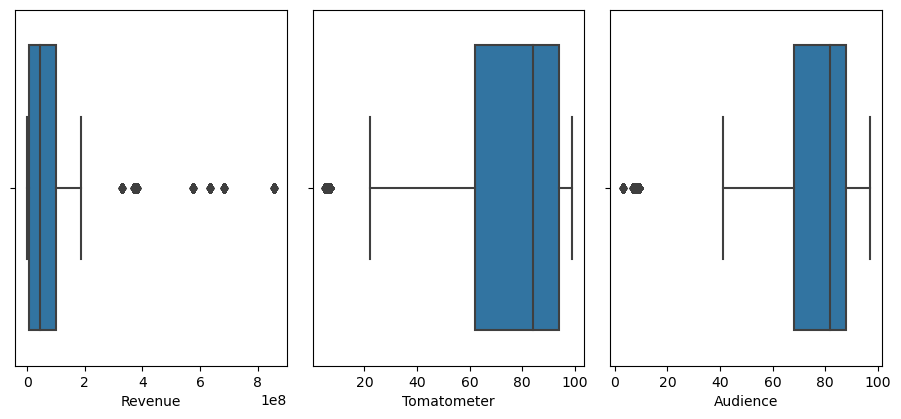

In [16]:
#aykırı değerlerin boxplot ile gösterimi

plt.figure(figsize=(12, 8))

plt.subplot(2, 4, 1)
sns.boxplot(x=df1['Revenue'])
plt.subplot(2, 4, 2)
sns.boxplot(x=df1['Tomatometer'])
plt.subplot(2, 4, 3)
sns.boxplot(x=df1['Audience'])

plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'Revenue'}>,
        <Axes: title={'center': 'Tomatometer'}>],
       [<Axes: title={'center': 'Audience'}>,
        <Axes: title={'center': 'Genre_Label'}>],
       [<Axes: title={'center': 'Director_Label'}>, <Axes: >]],
      dtype=object)

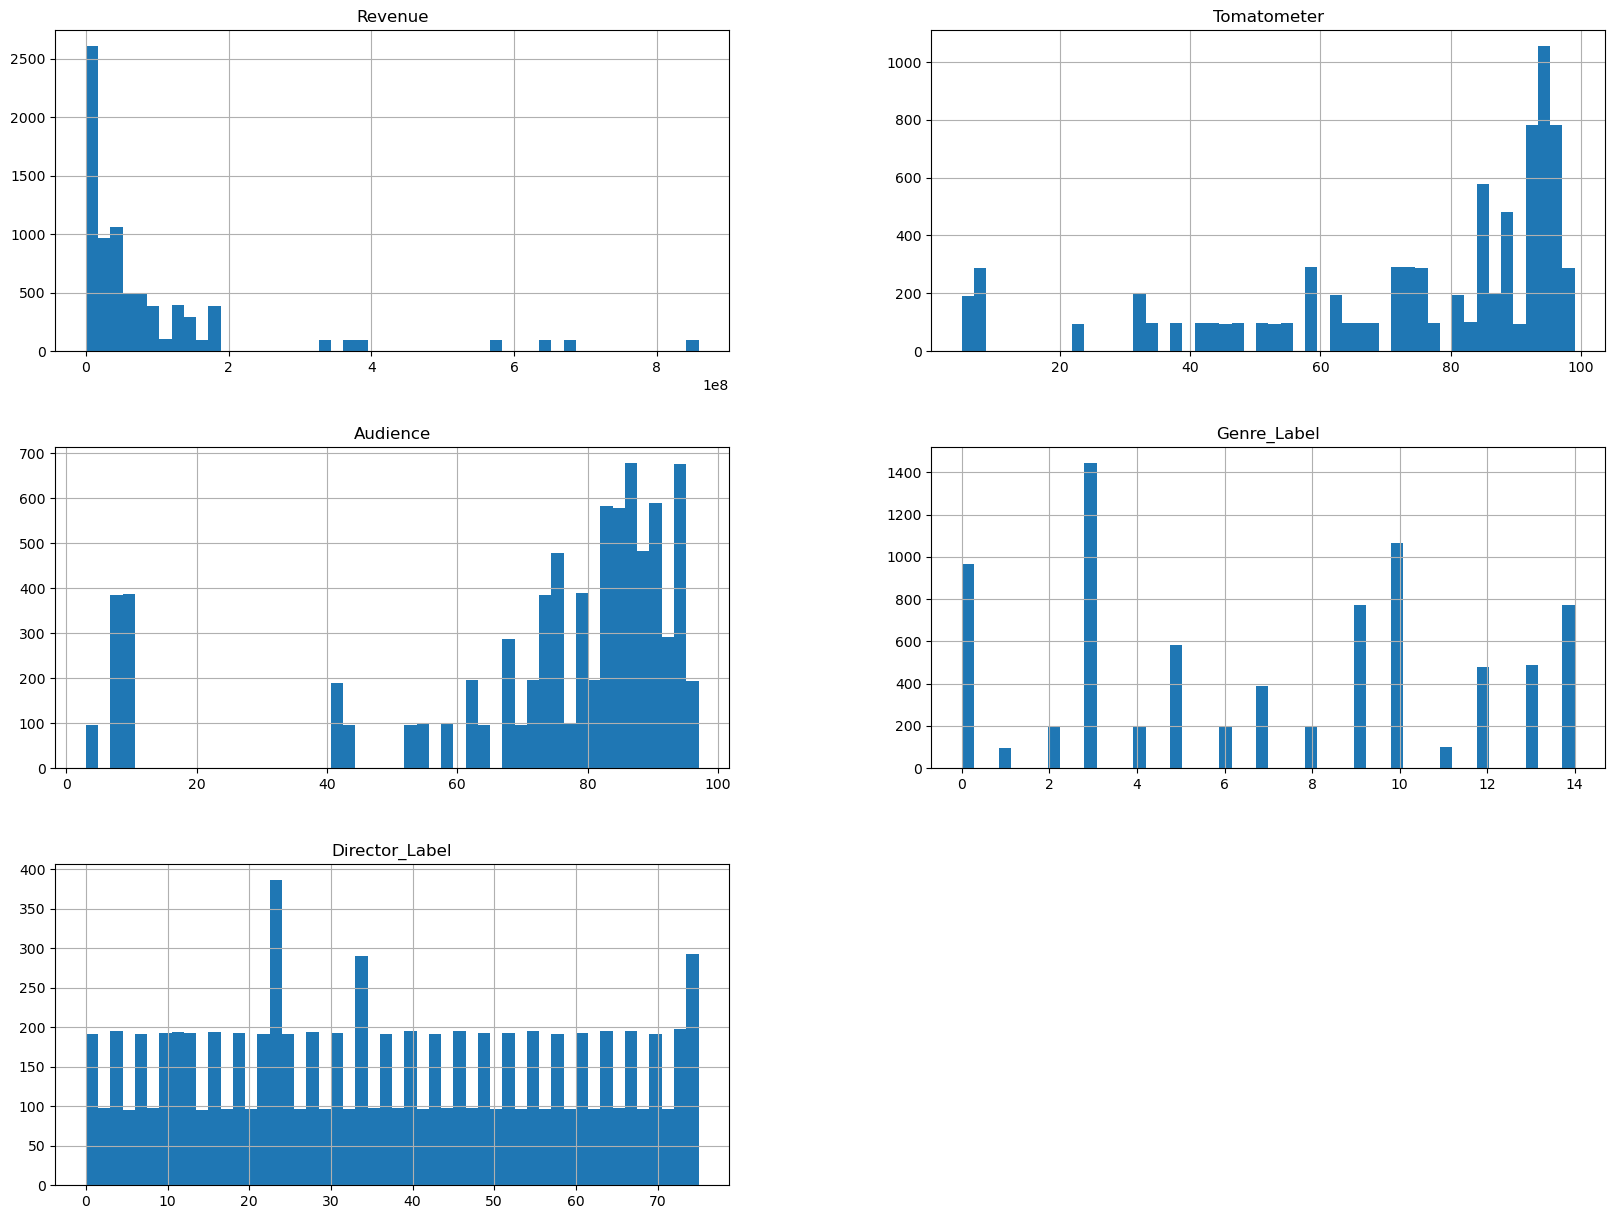

In [17]:
df1.hist(bins=50, figsize=(20,15))   #histogram çizdirir ön veri incelenmesi için kullanılır

In [18]:
df.describe()

,Revenue,Tomatometer,Audience,Genre_Label,Director_Label
count,7.939000e+03,7939.000000,7939.000000,7939.000000,7939.000000
mean,9.398182e+07,74.000126,72.221438,6.997985,37.095352
std,1.561927e+08,25.537002,25.607348,4.558320,21.893248
min,2.930000e+04,5.000000,3.000000,0.000000,0.000000
25%,7.700000e+06,62.000000,68.000000,3.000000,19.000000
50%,4.380000e+07,84.000000,82.000000,7.000000,36.000000
75%,1.012000e+08,94.000000,88.000000,10.000000,56.000000
max,8.584000e+08,99.000000,97.000000,14.000000,75.000000


In [19]:
def find_outliers_IQR(data):
    Q1 = data.quantile(0.25) #1. çeyrek
    Q3 = data.quantile(0.75) #3. çeyrek
    IQR = Q3 - Q1 #çeyrekler arası aralık
    upper_bound = (Q3 + 1.5 * IQR)
    lower_bound = (Q1 - 1.5 * IQR)
    outliers = data[(data < lower_bound) | (data > upper_bound)] #outlierları bulur
    return lower_bound, upper_bound, outliers #outlierları döndürür


LB, UB, outliers = find_outliers_IQR(df1)

print("upper bound of Data:","\n", UB)    #üst sınır
print("lower bound of Data:","\n", LB)    #alt sınır

#çıkan değerler ile aykırı değerlerden kurtulmak için filtreleme yapılır

upper bound of Data: 
 Revenue           241450000.0
Tomatometer             142.0
Audience                118.0
Genre_Label              20.5
Director_Label          111.5
dtype: float64
lower bound of Data: 
 Revenue          -132550000.0
Tomatometer              14.0
Audience                 38.0
Genre_Label              -7.5
Director_Label          -36.5
dtype: float64


In [20]:
df0 = df1[(df1['Revenue'] < 85257300) & (df1['Tomatometer'] < 116) & (df1['Audience'] < 93) & (df1['Genre_Label'] < 16) & (df1['Director_Label'] < 90)]


In [21]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5130 entries, 0 to 7938
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Revenue         5130 non-null   float64
 1   Tomatometer     5130 non-null   int64  
 2   Audience        5130 non-null   int64  
 3   Genre_Label     5130 non-null   int64  
 4   Director_Label  5130 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 240.5 KB


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7939 entries, 0 to 7938
Data columns (total 97 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Name                            7939 non-null   object 
 1   Revenue                         7939 non-null   float64
 2   Tomatometer                     7939 non-null   int64  
 3   Audience                        7939 non-null   int64  
 4   Genre_Label                     7939 non-null   int64  
 5   Director_Label                  7939 non-null   int64  
 6   Genre_Action                    7939 non-null   bool   
 7   Genre_Adventure                 7939 non-null   bool   
 8   Genre_Biography                 7939 non-null   bool   
 9   Genre_Comedy                    7939 non-null   bool   
 10  Genre_Crime                     7939 non-null   bool   
 11  Genre_Drama                     7939 non-null   bool   
 12  Genre_Fantasy                   79

In [23]:
df.columns

Index(['Name', 'Revenue', 'Tomatometer', 'Audience', 'Genre_Label',
       'Director_Label', 'Genre_Action', 'Genre_Adventure', 'Genre_Biography',
       'Genre_Comedy', 'Genre_Crime', 'Genre_Drama', 'Genre_Fantasy',
       'Genre_History', 'Genre_Holiday', 'Genre_Horror', 'Genre_Kids & family',
       'Genre_Musical', 'Genre_Mystery & thriller', 'Genre_Romance',
       'Genre_Sci-fi', 'Director_Aaron Horvath', 'Director_Alex Garland',
       'Director_Alexander Payne', 'Director_Andrew Cumming',
       'Director_Andrew Haigh', 'Director_Anthony Russo',
       'Director_Benjamin Renner', 'Director_Bryce McGuire',
       'Director_Celine Song', 'Director_Chris Buck',
       'Director_Christopher McQuarrie', 'Director_Christopher Nolan',
       'Director_Claire Denis', 'Director_Cord Jefferson',
       'Director_Craig Gillespie', 'Director_Dan Kwan', 'Director_Danny Boyle',
       'Director_Danny Philippou', 'Director_Darren Aronofsky',
       'Director_David Ayer', 'Director_David Zelln

In [24]:
df0.corr()  #korelasyon matrisi

,Revenue,Tomatometer,Audience,Genre_Label,Director_Label
Revenue,1.000000,-0.224131,0.271971,0.012756,0.029839
Tomatometer,-0.224131,1.000000,-0.029795,0.053267,-0.189944
Audience,0.271971,-0.029795,1.000000,-0.042038,0.055421
Genre_Label,0.012756,0.053267,-0.042038,1.000000,-0.347783
Director_Label,0.029839,-0.189944,0.055421,-0.347783,1.000000


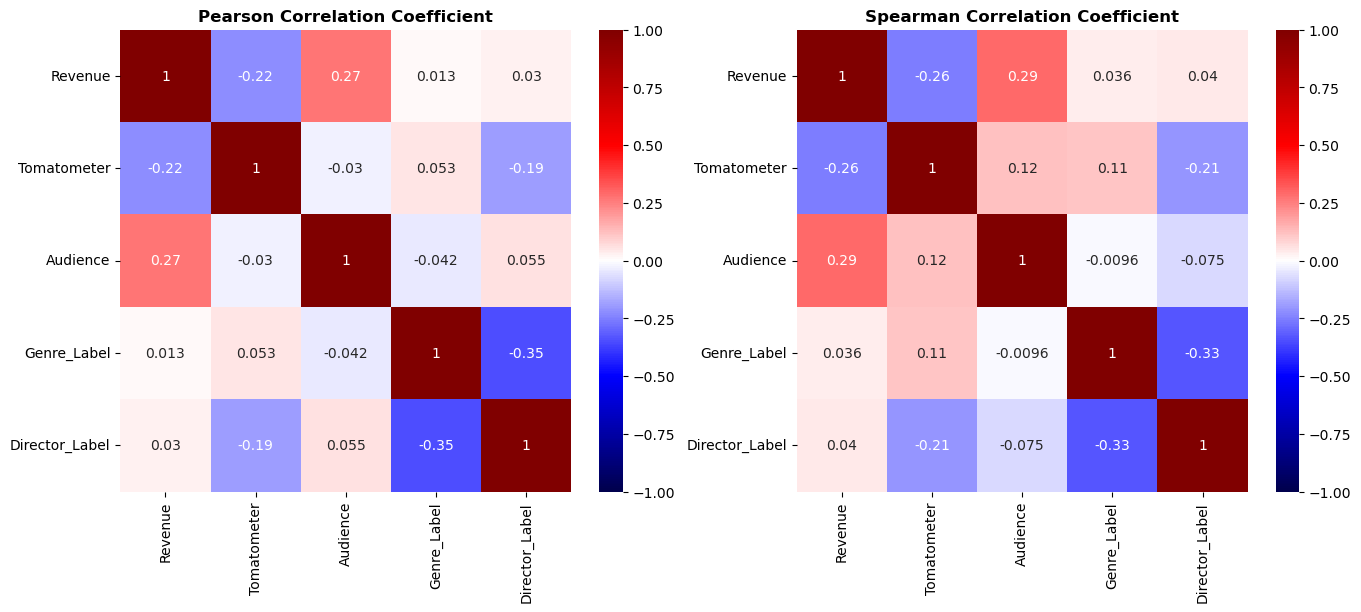

In [25]:
plt.figure(figsize=[16,6])

plt.subplot(1,2,1)
plt.title('Pearson Correlation Coefficient', weight='bold')
sns.heatmap(df0.corr(method='pearson'), cmap="seismic", annot=True, vmin=-1, vmax=1);

plt.subplot(1,2,2)
plt.title('Spearman Correlation Coefficient', weight='bold')
sns.heatmap(df0.corr(method='spearman'), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [26]:
df0.corr()['Revenue'].sort_values(ascending=False)

Revenue           1.000000
Audience          0.271971
Director_Label    0.029839
Genre_Label       0.012756
Tomatometer      -0.224131
Name: Revenue, dtype: float64

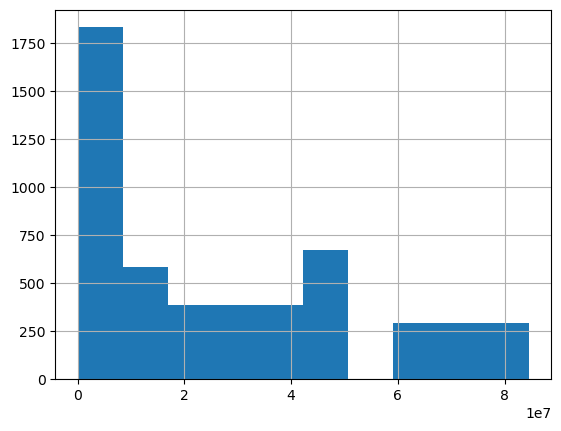

In [27]:
df0.Revenue.hist();

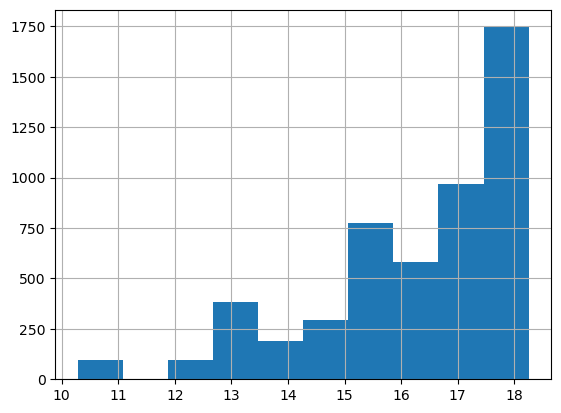

In [28]:
df0['log_Revenue'] = np.log(df0.Revenue)

# Artık dağılım daha iyi gözüküyor :)
df0.log_Revenue.hist();

In [29]:
X = df0.loc[:,['Tomatometer','Audience','Genre_Label','Director_Label']]

y = df0['Revenue']

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5130 entries, 0 to 7938
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Tomatometer     5130 non-null   int64
 1   Audience        5130 non-null   int64
 2   Genre_Label     5130 non-null   int64
 3   Director_Label  5130 non-null   int64
dtypes: int64(4)
memory usage: 200.4 KB


In [31]:
def split_and_test(X, y):
    '''
    Bu uygulamada sadece Lineer Regresyon algoritmasıyla
    çalışacağımız için Validation aşamasına ihtiyacımız yok
    '''
    
    # Veri Setini Train/Test Olarak Bölme
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Eğitim Veri Setiyle Lineer Regresyon Modeli Oluşturma
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # Test Veri Setiyle Model Skorunu Elde Etme
    test_score = lr_model.score(X_test, y_test)
    
    # Sonuçları Görüntüleme
    print('Test R2 Score:', round(test_score,3))

In [32]:
split_and_test(X, y)

Test R2 Score: 0.127


In [33]:
X2 = df0.loc[:,['Tomatometer','Audience','Genre_Label','Director_Label']]

y2 = df0['Revenue']

In [34]:
split_and_test(X2, y2)

Test R2 Score: 0.127


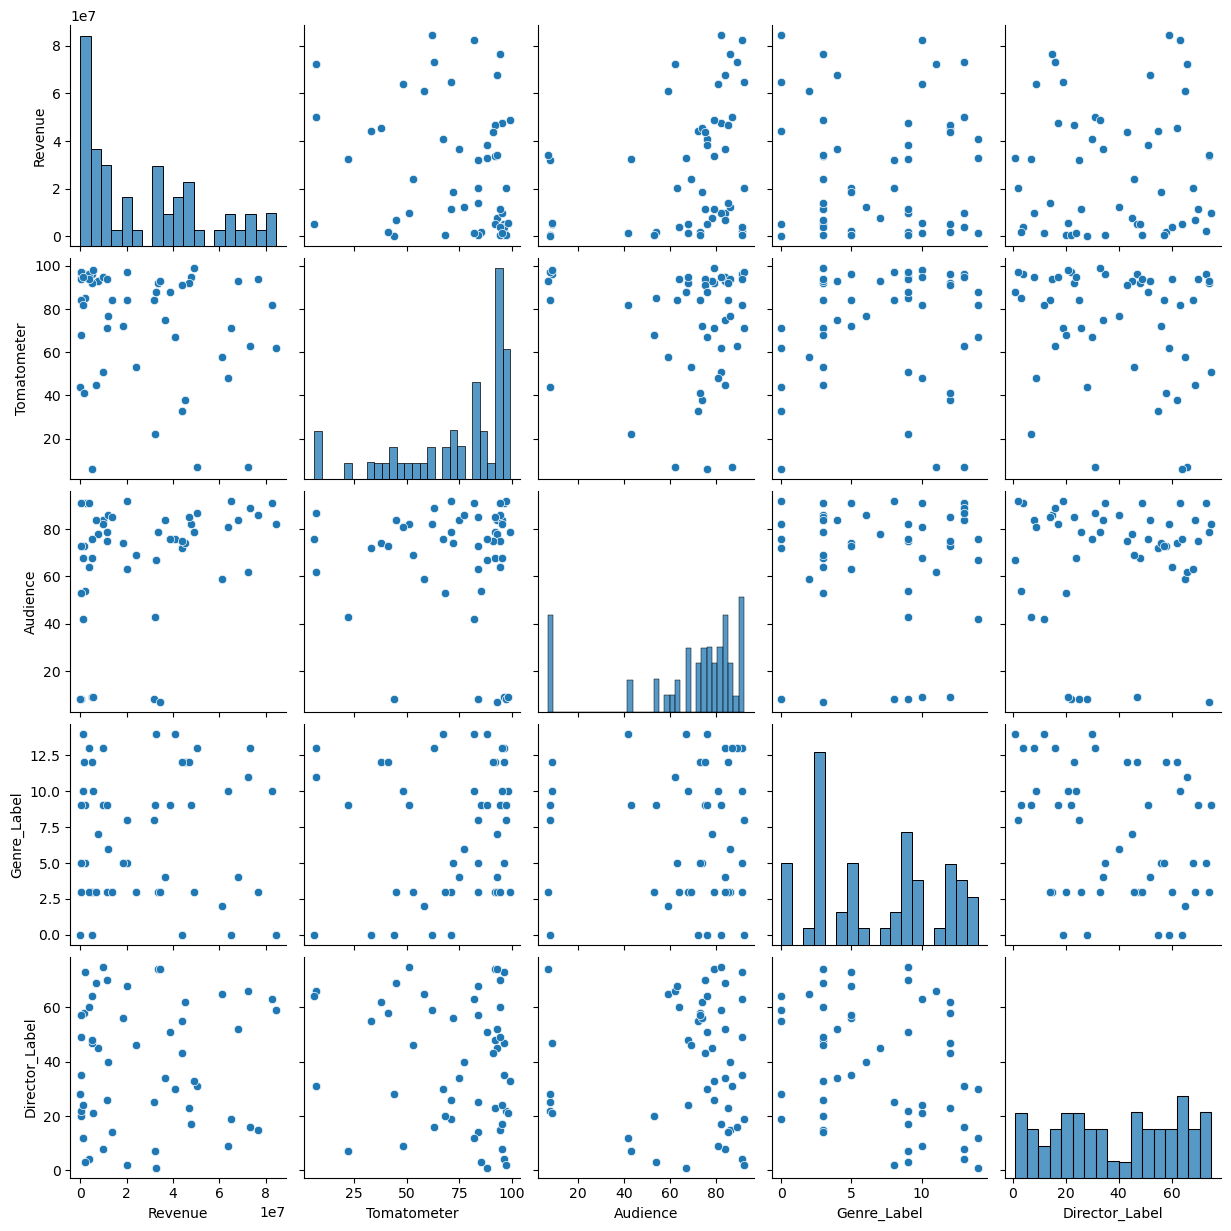

In [35]:
sns.pairplot(df0, vars=['Revenue','Tomatometer','Audience','Genre_Label','Director_Label']);

In [36]:
X

,Tomatometer,Audience,Genre_Label,Director_Label
0,33,72,0,55
1,96,91,5,73
2,92,79,3,74
4,93,78,7,45
5,82,91,10,63
...,...,...,...,...
7933,82,42,14,12
7934,6,76,0,64
7936,53,69,3,46
7937,45,84,3,69


In [37]:
X3 = X.copy()

X3['A2'] = X3['Audience'] ** 3
X3['T2'] = X3['Tomatometer'] ** 3
X3['G2'] = X3['Genre_Label'] ** 3
X3['D2'] = X3['Director_Label'] ** 5

X3.drop(columns=['Audience','Tomatometer','Genre_Label','Director_Label'], inplace=True) # Multicollinerity oluşmasını istemeyiz :)

split_and_test(X3, y)

Test R2 Score: 0.158


In [38]:
X3

,A2,T2,G2,D2
0,373248,35937,0,503284375
1,753571,884736,125,2073071593
2,493039,778688,27,2219006624
4,474552,804357,343,184528125
5,753571,551368,1000,992436543
...,...,...,...,...
7933,74088,551368,2744,248832
7934,438976,216,0,1073741824
7936,328509,148877,27,205962976
7937,592704,91125,27,1564031349


In [39]:
X4 = X.copy()

X4['A'] = X3['A2'] * X3['T2']
X4['T'] = X3['T2'] / X3['A2']



split_and_test(X4, y2)

Test R2 Score: 0.189


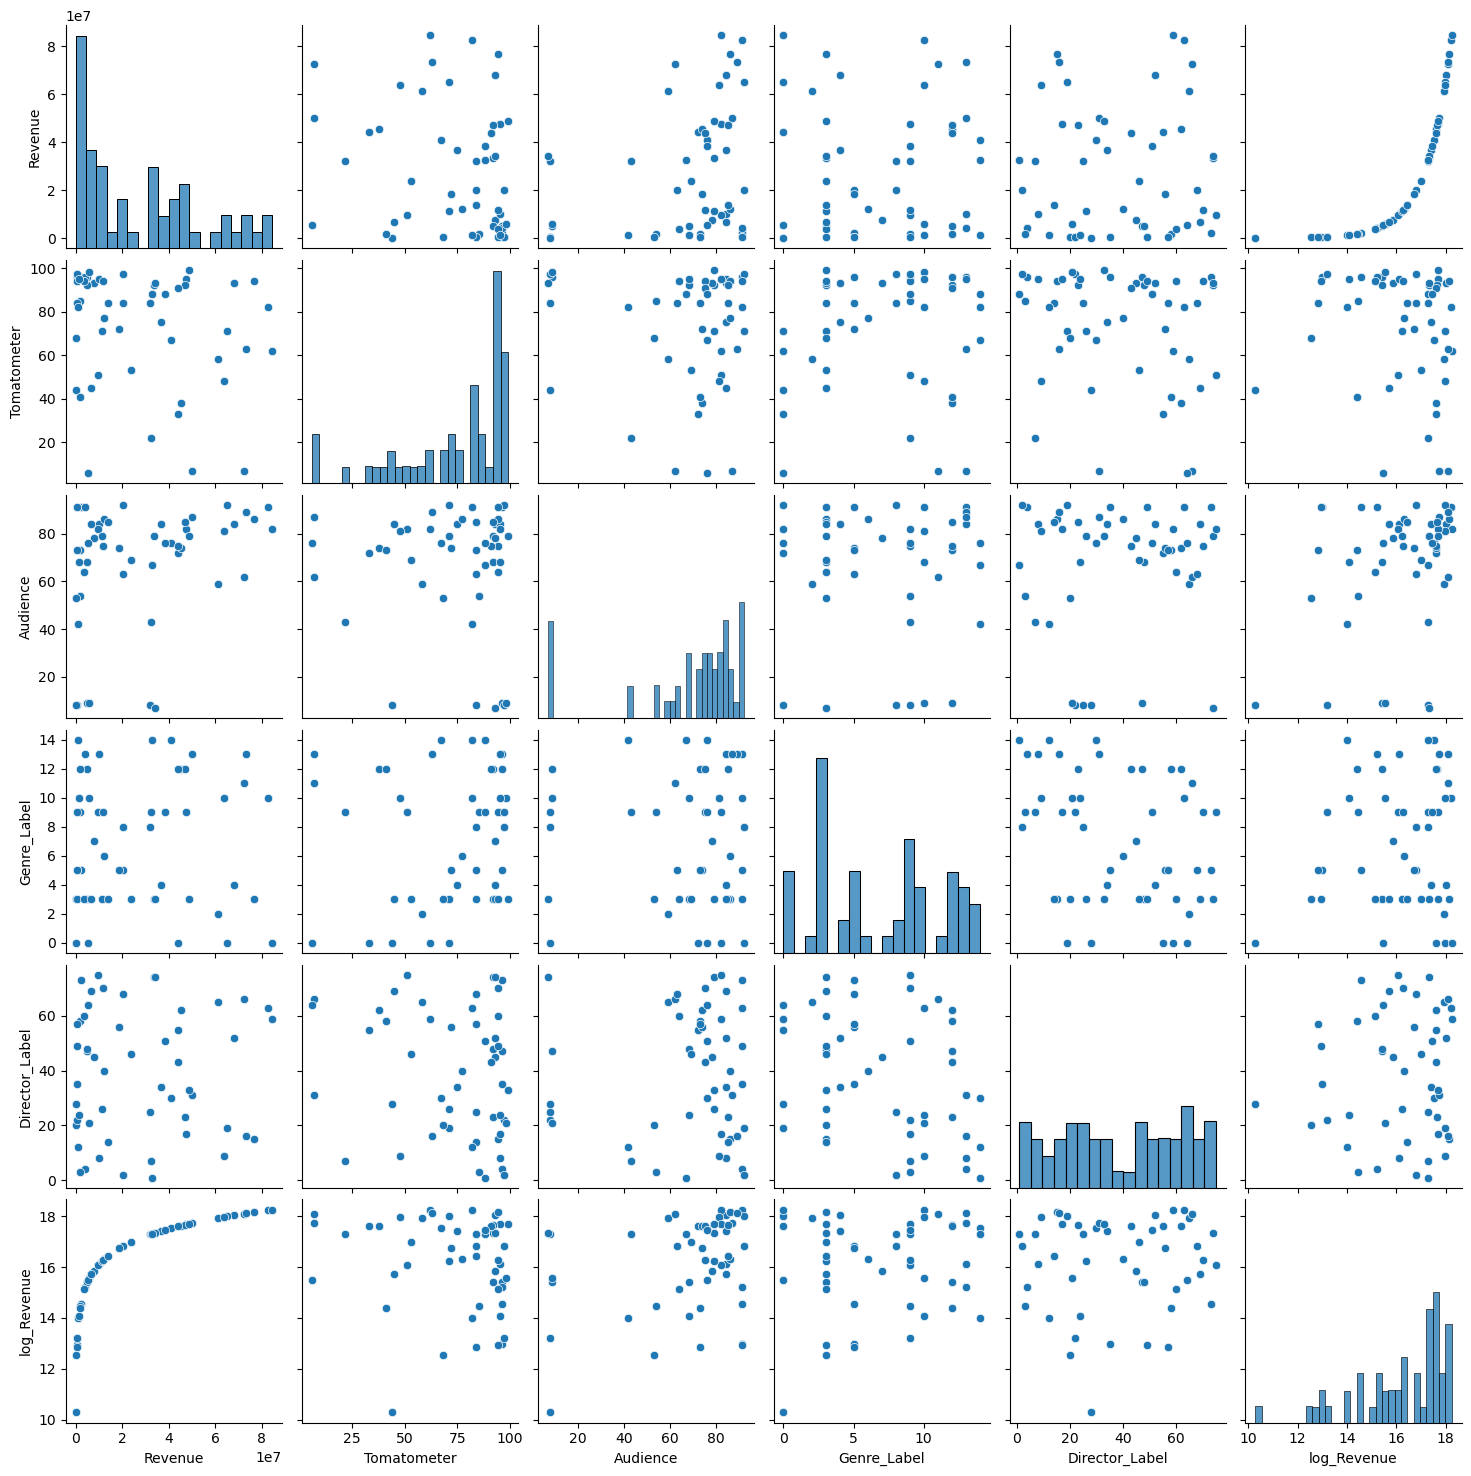

In [40]:
sns.pairplot(df0);

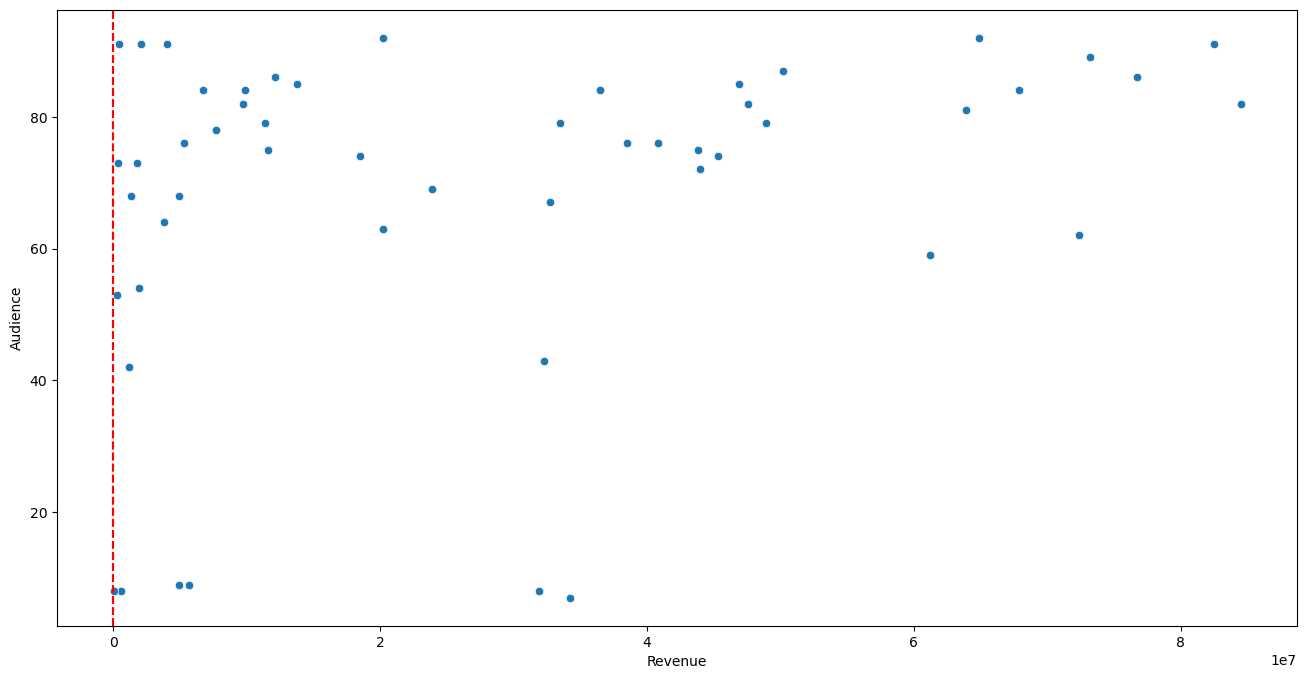

In [41]:
plt.figure(figsize=[16,8])
plt.axvline(x=0, ls='--', color='red')
plt.axvline(x=9, ls='--', color='red')
sns.scatterplot(x=df0['Revenue'], y=df0['Audience']);

In [42]:
X4

,Tomatometer,Audience,Genre_Label,Director_Label,A,T
0,33,72,0,55,13413413376,0.096282
1,96,91,5,73,666711392256,1.174058
2,92,79,3,74,383923552832,1.579364
4,93,78,7,45,381709223064,1.694982
5,82,91,10,63,415494935128,0.731674
...,...,...,...,...,...,...
7933,82,42,14,12,40849752384,7.442069
7934,6,76,0,64,94818816,0.000492
7936,53,69,3,46,48907434393,0.453190
7937,45,84,3,69,54010152000,0.153745


In [43]:
X5 = X.copy()

X5['AU_x_TM'] = X5['Audience'] * X5['Tomatometer']
X5['TM_/_AU'] = X5['Tomatometer'] / X5['Audience']
X5['GN_x_DR'] = X5['Audience'] * X5['Director_Label']
X5['DR_x_GN'] = X5['Director_Label'] * X5['Tomatometer']


split_and_test(X5, y2)


Test R2 Score: 0.224


In [44]:
import statsmodels.api as sm

# Modeli Oluşturma
X_train_constant = sm.add_constant(X5)
model = sm.OLS(y2, X_train_constant)

# Modeli Eğitme
fit = model.fit()

# Oluşturduğumuz modele ilişkin özet tablosunu görüntüleme
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     163.5
Date:                Thu, 14 Mar 2024   Prob (F-statistic):          2.50e-246
Time:                        23:10:31   Log-Likelihood:                -94226.
No. Observations:                5130   AIC:                         1.885e+05
Df Residuals:                    5121   BIC:                         1.885e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.627e+07   4.06e+06      4.009      0.000    8.32e+06    2.42e+07
Tomatometer    -8.574e+05   6.48e+04    -13.236      0.000   -9.84e+05    -7.3e+05
Audience        7.235e+05   5.76e+04     12.557      0.000    6.11e+05    8.36e+05
Genre_Label     3.096e+05   8.24e+04      3.759      0.000    1.48e+05    4.71e+05
Director_Label   9.72e+04   6.63e+04      1.467      0.143   -3.27e+04    2.27e+05
AU_x_TM         3358.2390    800.112      4.197      0.000    1789.677    4926.801
TM_/_AU         3.918e+06   3.15e+05     12.456      0.000     3.3e+06    4.53e+06
GN_x_DR        -7964.2478    677.667    -11.752      0.000   -9292.765   -6635.731
DR_x_GN         5653.0495    578.454      9.773      0.000    4519.032    6787.067
==============================================================================
Omnibus:                      354.597   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              340.584
Skew:                           0.575   Prob(JB):                     1.10e-74
Kurtosis:                       2.481   Cond. No.                     8.89e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
lr_model = LinearRegression()
lr_model.fit(X3, y2)
    
# Validation veri setiyle model sonucunu görme
validation_score = lr_model.score(X3, y2)
validation_score


0.15474832936283833

In [46]:
lr_model.score(X3, y2)

0.15474832936283833

In [47]:
import statsmodels.api as sm

# Modeli Oluşturma
X_train_constant = sm.add_constant(X5)
model = sm.OLS(y2, X_train_constant)

# Modeli Eğitme
fit = model.fit()

# Oluşturduğumuz modele ilişkin özet tablosunu görüntüleme
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     163.5
Date:                Thu, 14 Mar 2024   Prob (F-statistic):          2.50e-246
Time:                        23:10:31   Log-Likelihood:                -94226.
No. Observations:                5130   AIC:                         1.885e+05
Df Residuals:                    5121   BIC:                         1.885e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.627e+07   4.06e+06      4.009      0.000    8.32e+06    2.42e+07
Tomatometer    -8.574e+05   6.48e+04    -13.236      0.000   -9.84e+05    -7.3e+05
Audience        7.235e+05   5.76e+04     12.557      0.000    6.11e+05    8.36e+05
Genre_Label     3.096e+05   8.24e+04      3.759      0.000    1.48e+05    4.71e+05
Director_Label   9.72e+04   6.63e+04      1.467      0.143   -3.27e+04    2.27e+05
AU_x_TM         3358.2390    800.112      4.197      0.000    1789.677    4926.801
TM_/_AU         3.918e+06   3.15e+05     12.456      0.000     3.3e+06    4.53e+06
GN_x_DR        -7964.2478    677.667    -11.752      0.000   -9292.765   -6635.731
DR_x_GN         5653.0495    578.454      9.773      0.000    4519.032    6787.067
==============================================================================
Omnibus:                      354.597   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              340.584
Skew:                           0.575   Prob(JB):                     1.10e-74
Kurtosis:                       2.481   Cond. No.                     8.89e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
X5 = X5.drop(columns=['AU_x_TM','TM_/_AU','GN_x_DR','DR_x_GN'])

In [49]:
X5

,Tomatometer,Audience,Genre_Label,Director_Label
0,33,72,0,55
1,96,91,5,73
2,92,79,3,74
4,93,78,7,45
5,82,91,10,63
...,...,...,...,...
7933,82,42,14,12
7934,6,76,0,64
7936,53,69,3,46
7937,45,84,3,69


In [50]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
from sklearn.linear_model import LinearRegression


# Özellikler ve hedef değişkeni ayırma
X = df0.drop(columns=["Tomatometer","Audience","Genre_Label","Director_Label"])
y = df0["Revenue"]

# Modeli oluşturma ve eğitme
model = LinearRegression()
model.fit(X5, y2)

# Arayüz bileşenlerini oluşturma
tomatometer_widget = widgets.FloatText(description="Tomatometer:")
audience_widget = widgets.FloatText(description="Audience:")
genre_label_widget = widgets.FloatText(description="Genre_Label:")
director_label_widget = widgets.FloatText(description="Director_Label:")
button = widgets.Button(description="Tahmin Yap")
output = widgets.Output()

# Butona tıklandığında tahmin yapılacak işlem
def on_button_clicked(b):
    with output:
        tom = tomatometer_widget.value
        aud = audience_widget.value
        gen = genre_label_widget.value
        dir = director_label_widget.value
        revenue_pred = model.predict([[tom, aud, gen, dir]])
        
        print(f"Tahmini Gelir: {int(revenue_pred[0])}")  # Tahmini geliri tamsayıya dönüştür

# Butonun tıklama olayını bağlama
button.on_click(on_button_clicked)

# Arayüz bileşenlerini görüntüleme
display(tomatometer_widget, audience_widget, genre_label_widget, director_label_widget, button, output)


FloatText(value=0.0, description='Tomatometer:')

FloatText(value=0.0, description='Audience:')

FloatText(value=0.0, description='Genre_Label:')

FloatText(value=0.0, description='Director_Label:')

Button(description='Tahmin Yap', style=ButtonStyle())

Output()